# The SIN tests
Here we use MUTIS to analyze the correlations between simple functions, as a method for veryfing the correct functioning of MUTIS.

In [1]:
# I'm doing a lot of changes to MUTIS while writting this, better reload automatically.
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp

import matplotlib as mplt
import matplotlib.pyplot as plt

from mutis.signal import Signal
from mutis.correlation import Correlation

from numpy import pi as pi

def vertlines(x0,a,b,s):
    for x in (x0+s*np.arange(a,b)):
        ax.axvline(x=x, ymin=-1,ymax=+1, color='m', linewidth=3, alpha=0.5)

## 1. Sinusoidal functions

In [3]:
# Build signal 1
t1_o = np.linspace(2,6,40)
s1_o = np.sin(t1_o)

msk1 = np.random.randn(t1_o.size) > 0.6

t1_s = t1_o[msk1]
s1_s = s1_o[msk1]

In [4]:
# Build signal 2
t2_o = np.linspace(8,12,40)
s2_o = np.sin(t2_o)

msk2 = np.random.randn(t2_o.size) > 0.6

t2_s = t2_o[msk2]
s2_s = s2_o[msk2]

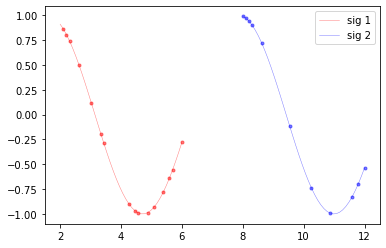

In [5]:
plt.figure()
plt.plot(t1_o,s1_o,'r-', lw=0.5, alpha=0.5, label='sig 1')
plt.plot(t1_s,s1_s,'r.', alpha=0.5)
plt.plot(t2_o,s2_o,'b-', lw=0.5, alpha=0.5, label='sig 2')
plt.plot(t2_s,s2_s,'b.', alpha=0.5)
plt.legend()
plt.show()

From this singals we would expect a maximum at 11-5=6, and several max and mins at distances of pi from this.

In [6]:
sig1_o = Signal(t1_o, s1_o, 'lc_gen_psd_nfft')
sig2_o = Signal(t2_o, s2_o, 'lc_gen_psd_nfft')
corr_o = Correlation(sig1_o,sig2_o,'welsh_ab')

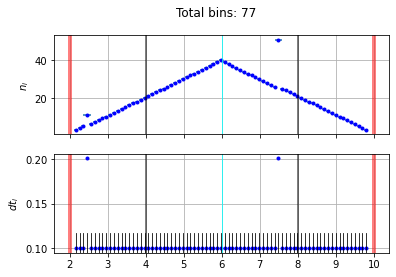

In [7]:
corr_o.gen_times(dtmin=0.1, dtmax=3, nbinsmin=3)
corr_o.plot_times(rug=True)

/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: overflow encountered in multiply
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: invalid value encountered in true_divide
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: divide by zero encountered in true_divide
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encoun

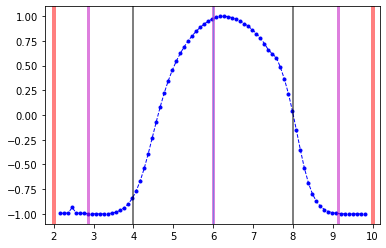

In [8]:
corr_o.gen_synth(400)
corr_o.gen_corr()
fig, ax = plt.subplots()
corr_o.plot_corr()
vertlines(6,-1,2, pi)
fig.show()

Indeed the correlation with the origina signals shows the expected peaks in their positions (the vertical red lines)

In [9]:
sig1_s = Signal(t1_s, s1_s, 'lc_gen_psd_nfft')
sig2_s = Signal(t2_s, s2_s, 'lc_gen_psd_nfft')
corr_s = Correlation(sig1_s,sig2_s,'welsh_ab')

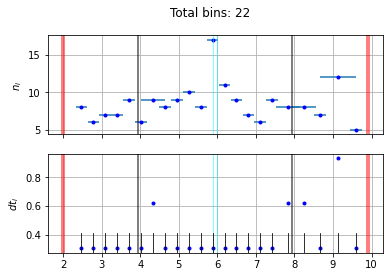

In [10]:
corr_s.gen_times(dtmin=0.3, dtmax=4, nbinsmin=5)
corr_s.plot_times(rug=True)

/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: invalid value encountered in true_divide
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: divide by zero encountered in true_divide
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:211: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum

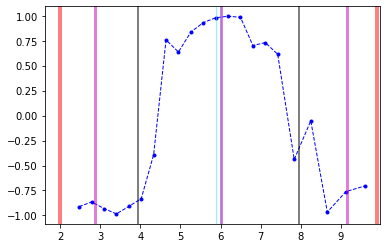

In [11]:
corr_s.gen_synth(400)
corr_s.gen_corr()
fig, ax = plt.subplots()
corr_s.plot_corr()

vertlines(6,-1,2,pi)

fig.show()

However, the correlation with the sampled signals shows only the central maximum and one of the minima, both with some uncertainy.

## 2. Pulse functions

In [12]:
# Build signal 1
t1_o = np.linspace(2,6,80)
s1_o = np.exp(-0.8*(t1_o-4)**2)

msk1 = np.random.randn(t1_o.size) > 0.6

t1_s = t1_o[msk1]
s1_s = s1_o[msk1]

In [13]:
# Build signal 2
t2_o = np.linspace(8,12,80)
s2_o = np.exp(-0.8*(t2_o-9)**2)

msk2 = np.random.randn(t2_o.size) > 0.5

t2_s = t2_o[msk2]
s2_s = s2_o[msk2]

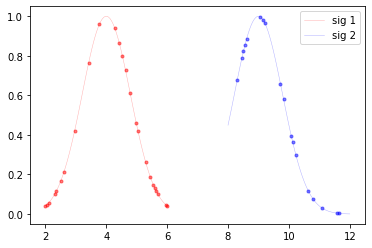

In [14]:
plt.figure()
plt.plot(t1_o,s1_o,'r-', lw=0.5, alpha=0.3, label='sig 1')
plt.plot(t1_s,s1_s,'r.', alpha=0.5)
plt.plot(t2_o,s2_o,'b-', lw=0.5, alpha=0.3, label='sig 2')
plt.plot(t2_s,s2_s,'b.', alpha=0.5)
plt.legend()
plt.show()

From these signals we would expect a strong maximum at 5 with close minima.

In [15]:
sig1_o = Signal(t1_o, s1_o, 'lc_gen_psd_nfft')
sig2_o = Signal(t2_o, s2_o, 'lc_gen_psd_nfft')
corr_o = Correlation(sig1_o,sig2_o,'welsh_ab')

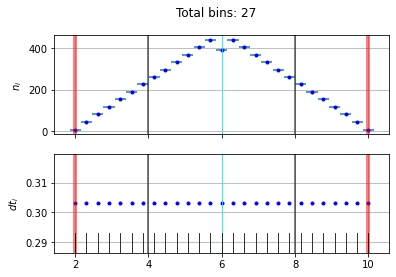

In [16]:
corr_o.gen_times(dtmin=0.3, dtmax=2, nbinsmin=5)
corr_o.plot_times(rug=True)

/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: invalid value encountered in multiply
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: invalid value encountered in true_divide
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:211: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr

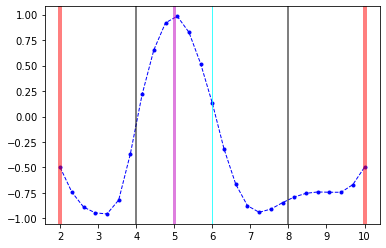

In [17]:
corr_o.gen_synth(400)
corr_o.gen_corr()

fig, ax = plt.subplots()
corr_o.plot_corr()
vertlines(5,0,1,0)
fig.show()

Which is what was expected.

In [18]:
sig1_s = Signal(t1_s, s1_s, 'lc_gen_psd_nfft')
sig2_s = Signal(t2_s, s2_s, 'lc_gen_psd_nfft')
corr_s = Correlation(sig1_s,sig2_s,'welsh_ab')

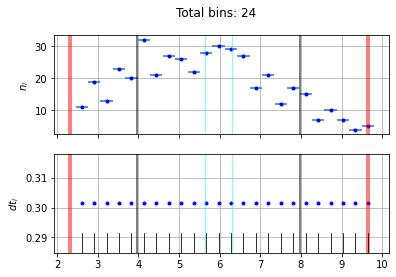

In [19]:
corr_s.gen_times(dtmin=0.3, dtmax=2, nbinsmin=3)
corr_s.plot_times(rug=True)

/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: invalid value encountered in true_divide
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: divide by zero encountered in true_divide
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_

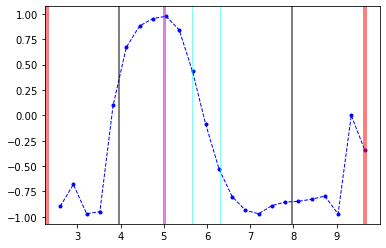

In [20]:
corr_s.gen_synth(400)
corr_s.gen_corr()
fig, ax = plt.subplots()
corr_s.plot_corr()
vertlines(5,0,1,0)
fig.show()

Which is as expected, but uglier.

## 3. Several pulses, with error

In [21]:
# Build signal 1
t1_o = np.linspace(2,16,35)
s1_o = np.exp(-1.8*(t1_o-4)**2) + np.exp(-1.8*(t1_o-12)**2) + 0.01

msk1 = np.random.rand(t1_o.size) < 1.5*(s1_o+0.1)

t1_s = t1_o[msk1]
s1_s = s1_o[msk1]

# ... and add error:
t1_s = t1_s + 0.01*np.random.randn(t1_s.size)
s1_s = s1_s + 0.3*s1_s*np.random.randn(s1_s.size)  + 0.05*np.random.rand(s1_s.size)

In [22]:
# Build signal 2
t2_o = np.linspace(7,23,50)
s2_o = np.exp(-1.8*(t2_o-12)**2) + np.exp(-1.8*(t2_o-20)**2) + 0.01

msk2 = np.random.rand(t2_o.size) < 1.5*(s2_o+0.1)

t2_s = t2_o[msk2]
s2_s = s2_o[msk2]

# ... and add error:
t2_s = t2_s + 0.01*np.random.randn(t2_s.size)
s2_s = s2_s + 0.3*s2_s*np.random.randn(s2_s.size) + 0.05*np.random.rand(s2_s.size)

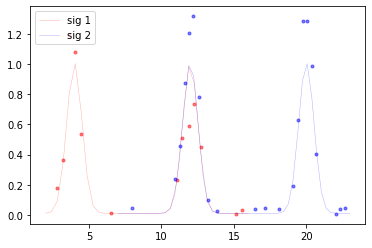

In [23]:
plt.figure()
plt.plot(t1_o,s1_o,'r-', lw=0.5, alpha=0.3, label='sig 1')
plt.plot(t1_s,s1_s,'r.', alpha=0.5)
plt.plot(t2_o,s2_o,'b-', lw=0.5, alpha=0.3, label='sig 2')
plt.plot(t2_s,s2_s,'b.', alpha=0.5)
plt.legend()
plt.show()

From these signals we would expect a strong maximum at 8 with close minima (and maybe others peaks near 16 and 0)

In [24]:
sig1_o = Signal(t1_o, s1_o, 'lc_gen_psd_nfft')
sig2_o = Signal(t2_o, s2_o, 'lc_gen_psd_nfft')
corr_o = Correlation(sig1_o,sig2_o,'welsh_ab')

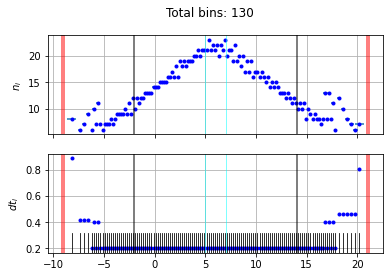

In [25]:
corr_o.gen_times(dtmin=0.2, dtmax=1, nbinsmin=6)
corr_o.plot_times(rug=True)

/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: invalid value encountered in true_divide
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
<ipython-input-26-baac3441084c>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


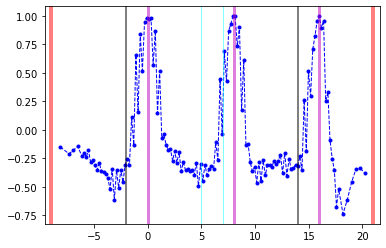

In [26]:
corr_o.gen_synth(400)
corr_o.gen_corr()

fig, ax = plt.subplots()
corr_o.plot_corr()
vertlines(8,0,1,0)
vertlines(16,0,1,0)
vertlines(0,0,1,0)
fig.show()

Which is what was expected.

In [27]:
sig1_s = Signal(t1_s, s1_s, 'lc_gen_psd_nfft')
sig2_s = Signal(t2_s, s2_s, 'lc_gen_psd_nfft')
corr_s = Correlation(sig1_s,sig2_s,'welsh_ab')

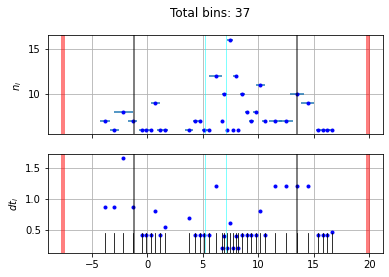

In [28]:
corr_s.gen_times(dtmin=0.2, dtmax=3, nbinsmin=6)
corr_s.plot_times(rug=True)

/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: invalid value encountered in true_divide
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/juan/Desktop/Doctorado/work/0235+164/MUTIS/mutis/lib/correlation.py:83: RuntimeWarning: invalid value encountered in multiply
  udcf = (d1m - np.mean(d1m[msk])) * (d2m - np.mean(d2m[msk])) / np.std(d1m[msk]) / np.std(d2m[msk])
/Users/juan/miniconda3/envs/mutis/lib/python3.9/site-packages/numpy/core/_methods.py:211: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr

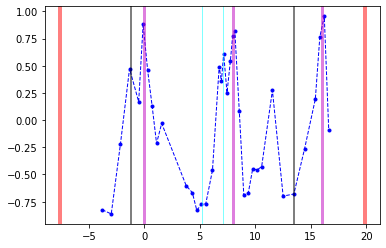

In [29]:
corr_s.gen_synth(400)
corr_s.gen_corr()
fig, ax = plt.subplots()
corr_s.plot_corr()
vertlines(8,0,1,0)
vertlines(16,0,1,0)
vertlines(0,0,1,0)
fig.show()

Which is as expected, but uglier.